PDS Graded Project - 2

Domain -

E-commerce

Business Context -

Customer segmentation is one of the most important marketing tools at your disposal, because it can help a business to better understand its target audience. This is because it groups customers based on common characteristics. Segmentation can be based on the customer’s habits and lifestyle, in particular, their buying habits. Different age groups, for example, tend to spend their money in different ways, so brands need to be aware of who exactly is buying their product. Segmentation also focuses more on the personality of the consumer, including their opinions, interests, reviews, and rating. Breaking down a large customer base into more manageable clusters, making it easier to identify your target audience and launch campaigns and promote the business to the most relevant people.

Dataset Description -

The dataset contains measurements of clothing fit from RentTheRunway. RentTheRunWay is a unique platform that allows women to rent clothes for various occasions. The collected data is of several categories. This dataset contains self-reported fit feedback from customers as well as other side information like reviews, ratings, product categories, catalog sizes, customers’ measurements (etc.)

Attribute Information -

. User_id - A unique id for the customer. 
Item_id - Unique product id. 
Weight - Weight measurement of custome. r
Rented For - Purpose clothing was rented f. or
Body Type - Body type of custo. mer
Review_text - Review given by the cust. omer
Size - The standardized size of the pr. oduct
Rating - Rating for the p. roduct
Age - Age of the c. ustomer
Category - The category of the.  product
Bust Size - Bust measurement of.  customer
Height - Height of th. e customer
Review_Date - Date when the review . was written
Fit - Fit feedback

Project Objective -

Based on the given users and items data of an e-commerce company, segment the similar user and items into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

A. Import the required libraries and load the data

1. Load the required libraries and read the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import ward
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist
from scipy.spatial import distance
from scipy.stats import zscore

In [2]:
df = pd.read_csv("renttherunway.csv")
df.head(2)

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"


2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
df.sample(5)

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
161414,161414,fit,822243,34c,1869763,135lbs,10.0,wedding,This dress was AWESOME! It is much lighter wei...,athletic,"Gorgeous, Flattering, and Comfortable!",shift,"5' 2""",8,29.0,"July 18, 2016"
41883,41883,fit,137766,34b,1187427,138lbs,8.0,date,loved the fabric and this simple shift was ver...,NaN,"comfortable, eye-popping color, flattering lines",dress,"5' 7""",8,37.0,"November 21, 2016"
131532,131532,small,807204,NaN,1373610,155lbs,8.0,everyday,Pros: Great cut. Fun and unique\nCons: Fit ver...,hourglass,I ended up not wearing it. It fit fine everywh...,dress,"5' 7""",16,50.0,"October 17, 2017"
137405,137405,fit,538601,NaN,1954806,NaN,10.0,party,The dress is very comfortable. I am tall and i...,hourglass,This dress is wonderful! Wish I could have kep...,dress,"5' 11""",20,31.0,"May 19, 2016"
49420,49420,fit,753006,34d,145906,180lbs,8.0,formal affair,This dress exudes effortless beauty. I felt s...,pear,Shamefully checked myself out in every mirror! :),gown,"5' 2""",12,31.0,"January 27, 2013"


In [4]:
df.shape

(192544, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192476 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192197 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

B. Data cleansing and Exploratory data analysis

3. Check if there are any duplicate records in the dataset? If any, drop them.

In [6]:
df.duplicated().sum()

0

4. Drop the columns which you think redundant for the analysis.(Hint: drop columns like ‘id’, ‘review’)

In [7]:
df.head(2)

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"


In [10]:
df.drop(['Unnamed: 0', 'user_id', 'item_id','review_text', 'review_summary','review_date'], inplace=True, axis=1)

In [11]:
df.head(2)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0


5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float. (Hint: 'weight' has the suffix as lbs)

In [12]:
if df['weight'].str.contains('[a-zA-Z]').any():
    df['weight'] = df['weight'].str.replace('lbs', '').astype(float)

In [13]:
df['weight'].head()

0    137.0
1    132.0
2      NaN
3    135.0
4    145.0
Name: weight, dtype: float64

6. Check the unique categories for the column 'rented for' and group 'party:cocktail' category with 'party'.

In [14]:
df[ 'rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [15]:
df['rented for'] = df['rented for'].replace(['party', 'party: cocktail' ], 'party' )

In [16]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan], dtype=object)

7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype.

In [17]:
df['height'].head(2)

0    5' 8"
1    5' 6"
Name: height, dtype: object

In [18]:
df['height'] = df['height'].str.replace('"','')

In [19]:
df["height"] = (df.height.str.split("'").str[0].astype(float) * 12) + (df.height.str.split("'").str[1].astype(float))

In [20]:
df["height"].head(2)

0    68.0
1    66.0
Name: height, dtype: float64

8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods.

In [21]:
df.isnull().sum()/len(df) * 100

fit            0.000000
bust size      9.561970
weight        15.571506
rating         0.042588
rented for     0.005194
body type      7.601899
category       0.000000
height         0.351608
size           0.000000
age            0.498587
dtype: float64

In [22]:
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(include=[object]).columns.tolist()
print('Numerical Columns = ' , numerical_columns)
print('Categorical Columns= ' , categorical_columns)

Numerical Columns =  ['weight', 'rating', 'height', 'size', 'age']
Categorical Columns=  ['fit', 'bust size', 'rented for', 'body type', 'category']


In [23]:
df[numerical_columns] = df[numerical_columns].apply(lambda x: x.fillna(x.median()))
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [24]:
df.isnull().sum().sum()

0

9. Check the statistical summary for the numerical and categorical columns and write your findings.

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
weight,192544.0,137.019284,20.141448,50.0,125.0,135.0,145.0,300.0
rating,192544.0,9.092758,1.429862,2.0,8.0,10.0,10.0,10.0
height,192544.0,65.309529,2.658857,54.0,63.0,65.0,67.0,78.0
size,192544.0,12.245175,8.494877,0.0,8.0,12.0,16.0,58.0
age,192544.0,33.861689,8.039050,0.0,29.0,32.0,37.0,117.0


In [26]:
df.describe(include='object').T

,count,unique,top,freq
fit,192544,3,fit,142058
bust size,192544,106,34b,45696
rented for,192544,8,wedding,57794
body type,192544,7,hourglass,69986
category,192544,68,dress,92884


10. Are there outliers present in the column age? If yes, treat them with the appropriate method.

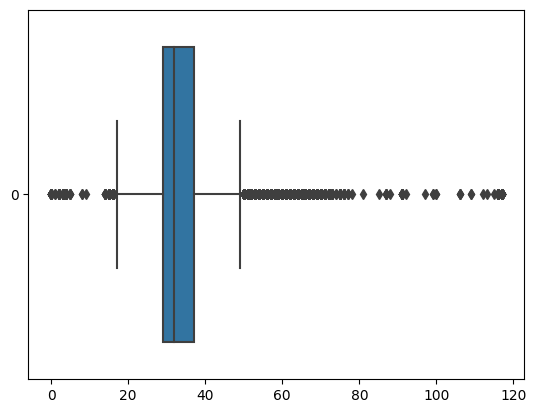

In [27]:
sns.boxplot(df['age'], orient="h")
plt.show()

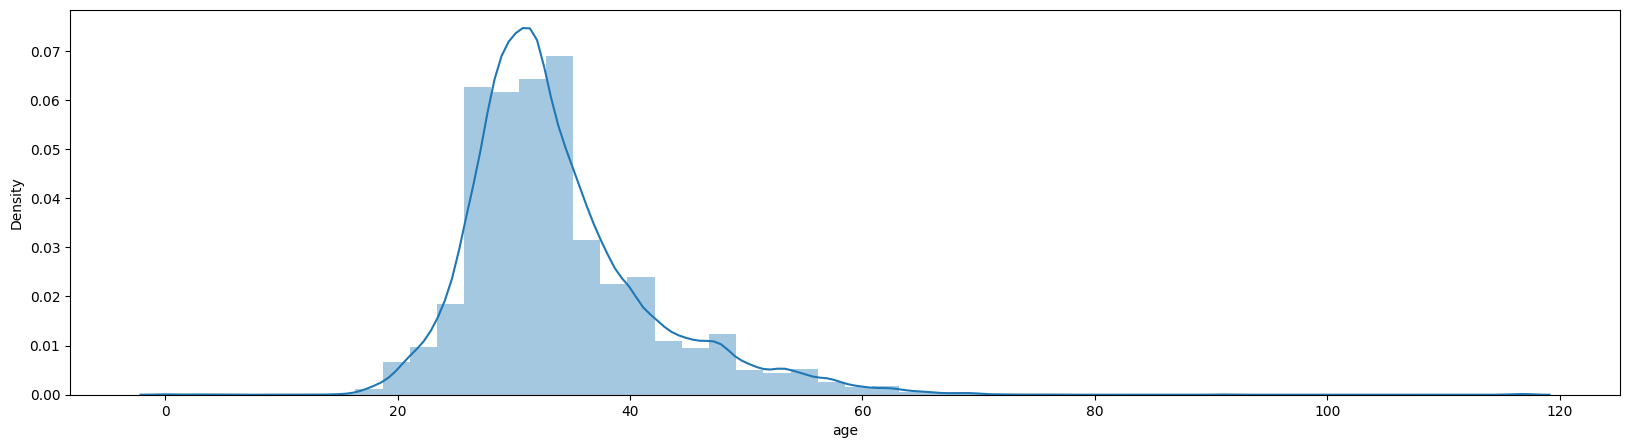

In [28]:
plt.figure(figsize=[20,5])
sns.distplot(df['age'])
plt.show()

In [29]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

print('Quartile 1 = ', Q1)
print('Quartile 3 = ', Q3)
print('Inter Quartile Range = ', IQR)

Quartile 1 =  29.0
Quartile 3 =  37.0
Inter Quartile Range =  8.0


In [30]:
lower_whisker = Q1-(1.5*IQR)
upper_whisker = Q3+(1.5*IQR)

print('Lower Whisker = ', lower_whisker)
print('Upper Whisker = ' , upper_whisker)

Lower Whisker =  17.0
Upper Whisker =  49.0


In [31]:
df = df.loc[(df['age'] < upper_whisker) & (df['age'] > lower_whisker)]

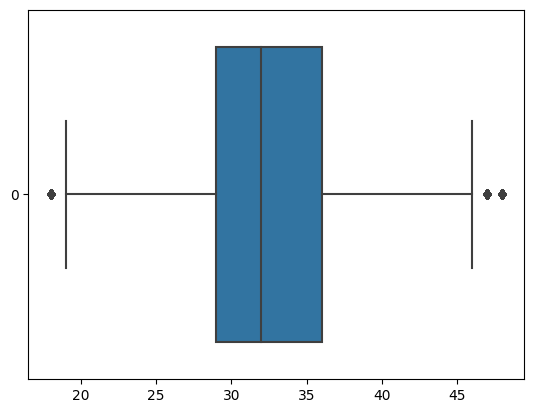

In [32]:
sns.boxplot(df['age'], orient="h")
plt.show()

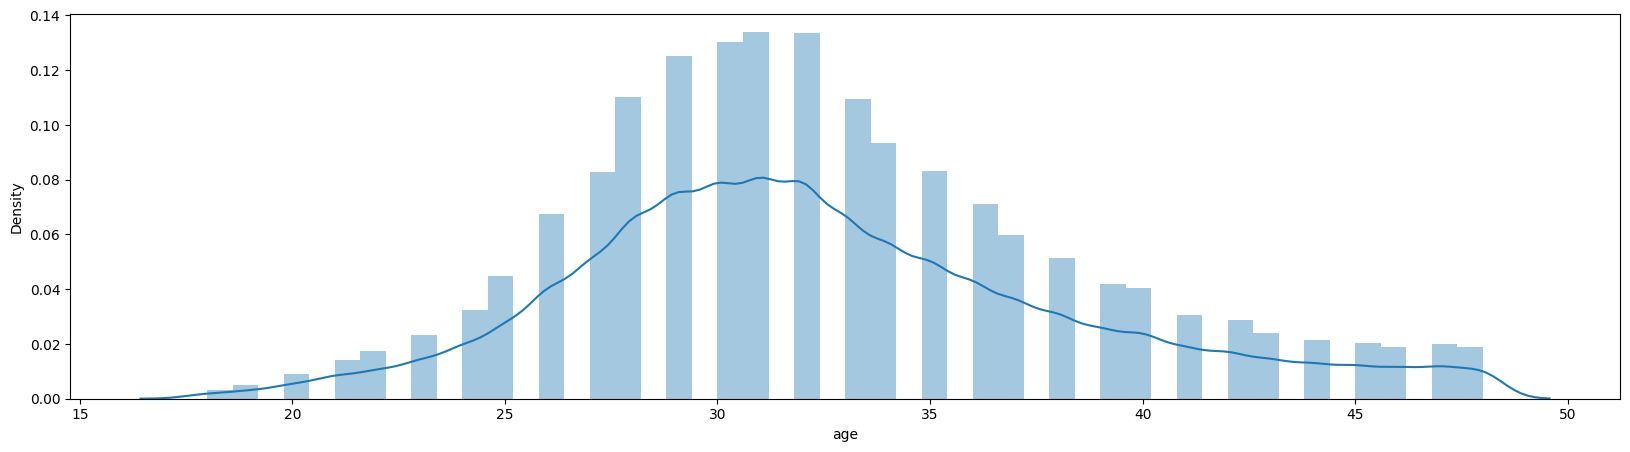

In [33]:
plt.figure(figsize=[20,5])
sns.distplot(df['age'])
plt.show()

11. Check the distribution of the different categories in the column 'rented for' using appropriate plot.

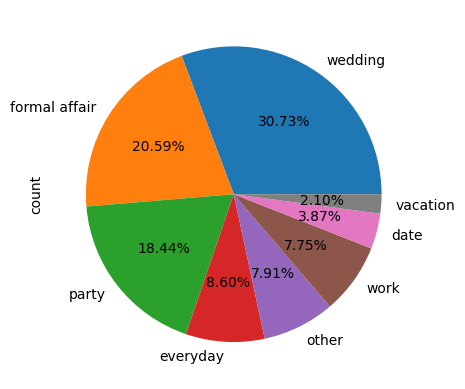

In [34]:
df['rented for'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

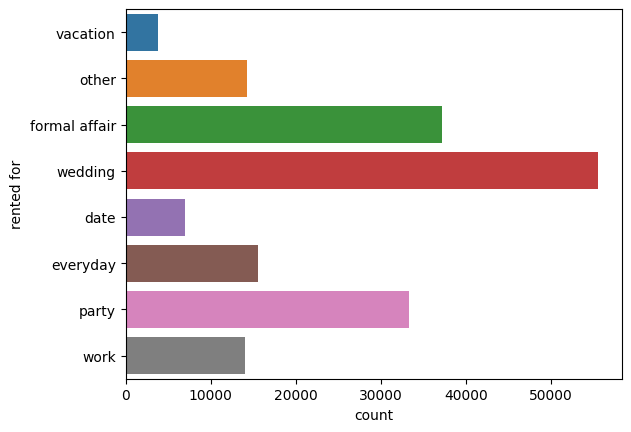

In [35]:
sns.countplot(y='rented for', data=df)
plt.show()

Random Sampling for Analysis - Sampling Size = 20,000 (11.07% of the Total Data)

In [36]:
df.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,65.0,8,34.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,69.0,12,27.0
5,fit,32b,138.0,8.0,date,athletic,dress,68.0,8,45.0


In [37]:
df.isnull().sum().sum()

0

In [38]:
df.shape

(180708, 10)

In [39]:
data = df.sample(n=20000, random_state=10).reset_index()
data.drop(['index'], inplace=True, axis=1)

In [40]:
data.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34c,140.0,8.0,work,pear,dress,67.0,8,37.0
1,fit,36d,140.0,10.0,other,full bust,dress,64.0,20,37.0
2,fit,32b,100.0,10.0,party,petite,sheath,62.0,1,30.0
3,fit,36dd,163.0,10.0,everyday,full bust,jacket,66.0,20,47.0
4,small,36b,135.0,8.0,wedding,hourglass,shift,68.0,20,32.0


In [41]:
data.isnull().sum().sum()

0

In [42]:
data.shape

(20000, 10)

C. Data Preparation for model building

12. Encode the categorical variables in the dataset.

In [43]:
dfe = data.copy()

In [44]:
dfe.shape

(20000, 10)

In [45]:
 labelEncoder = LabelEncoder()

In [46]:
cols = dfe.select_dtypes('object').columns

for i in cols:
    dfe[i]=labelEncoder.fit_transform(data[i])

In [47]:
dfe.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0,32,140.0,8.0,7,4,12,67.0,8,37.0
1,0,45,140.0,10.0,3,2,12,64.0,20,37.0
2,0,18,100.0,10.0,4,5,36,62.0,1,30.0
3,0,47,163.0,10.0,1,2,17,66.0,20,47.0
4,2,43,135.0,8.0,6,3,37,68.0,20,32.0


13. Standardize the data, so that the values are within a particular range.

In [48]:
scaler = StandardScaler()

dfs = pd.DataFrame(scaler.fit_transform(dfe), columns=dfe.columns)

In [49]:
dfs.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,-0.558212,-0.032392,0.152080,-0.763732,1.483774,0.648129,-0.581060,0.627336,-0.476277,0.766187
1,-0.558212,1.242887,0.152080,0.645368,-0.467309,-0.619791,-0.581060,-0.498806,0.947800,0.766187
2,-0.558212,-1.405769,-1.827066,0.645368,0.020462,1.282088,1.665124,-1.249568,-1.306988,-0.421371
3,-0.558212,1.439083,1.290089,0.645368,-1.442850,-0.619791,-0.113105,0.251956,0.947800,2.462698
4,2.252168,1.046690,-0.095313,-0.763732,0.996003,0.014169,1.758715,1.002717,0.947800,-0.082069


D. Principal Component Analysis and Clustering

14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [50]:
dfs.shape

(20000, 10)

In [51]:
cov_matrix = np.cov(dfs.T)

In [52]:
cov_matrix

array([[ 1.00005000e+00,  6.24174708e-03,  1.20814181e-02,
        -2.48824772e-01,  9.50343994e-03, -8.12611242e-03,
        -3.21258156e-03, -6.41755218e-03,  6.42796158e-02,
        -1.07924715e-02],
       [ 6.24174708e-03,  1.00005000e+00,  5.76912367e-01,
        -3.23915334e-02,  6.82137809e-03, -2.29072439e-01,
        -5.94504414e-03,  1.48975520e-01,  6.23649112e-01,
         1.48710917e-01],
       [ 1.20814181e-02,  5.76912367e-01,  1.00005000e+00,
        -2.77906346e-02,  1.71327894e-02, -2.42217456e-01,
        -9.45413114e-03,  3.49146267e-01,  7.24714334e-01,
         6.85616971e-02],
       [-2.48824772e-01, -3.23915334e-02, -2.77906346e-02,
         1.00005000e+00,  1.06105786e-02,  1.36806000e-02,
        -2.97938789e-02, -4.28258407e-04, -5.25414439e-02,
        -5.32862956e-02],
       [ 9.50343994e-03,  6.82137809e-03,  1.71327894e-02,
         1.06105786e-02,  1.00005000e+00, -8.80956847e-03,
        -3.07316195e-02, -1.86051155e-02,  1.19168550e-02,
        -2.

In [53]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

print('Eigen Values = ','\n',eigen_values)
print('\n')
print('Eigen Vectors = ','\n',eigen_vectors)

Eigen Values =  
 [2.5588255  0.2588197  0.41413689 1.25296228 0.74100552 1.05664243
 1.01044516 0.97161956 0.84772024 0.88832274]


Eigen Vectors =  
 [[-3.61025129e-02 -4.90820114e-02  4.20917959e-02 -6.86479666e-01
  -6.79300974e-01  2.10000178e-01  7.95237087e-02  4.86819296e-02
   9.21144313e-02 -2.30782646e-02]
 [-4.96324793e-01 -8.71402738e-02  7.91853483e-01  2.08258907e-02
   5.20147186e-02 -7.71621112e-02 -1.67016559e-01 -9.58281864e-03
   2.13326190e-01 -1.90915346e-01]
 [-5.44594148e-01 -6.84369200e-01 -4.38477460e-01  5.63481554e-02
   2.63071012e-02  7.05935326e-02  5.74794476e-02 -2.95864949e-03
  -1.64532720e-02 -1.74239932e-01]
 [ 5.05335741e-02  1.81390497e-03  1.80676250e-03  7.01047043e-01
  -6.95183896e-01  2.86372801e-03 -2.83863670e-02 -2.07351703e-02
   1.29727311e-01 -6.79638814e-02]
 [-8.33287171e-03  6.77485306e-03  1.45540721e-02  2.19063682e-02
   1.52325243e-02  5.50944549e-01 -4.76455912e-01 -6.45383836e-01
  -2.16878760e-01  6.96713772e-02]
 [ 2.64060217

In [54]:
total = sum(eigen_values)

variance_explained = [(i/total)*100 for i in sorted(eigen_values, reverse=True)]

cummulative_variance_explained = np.cumsum(variance_explained)

In [55]:
print('Explained Variance = ', variance_explained)
print('\n')
print('Cummulative Variance Explained = ', cummulative_variance_explained)

Explained Variance =  [25.586975569658698, 12.52899629900543, 10.565895972880075, 10.103946361350365, 9.715709758421363, 8.882783271388387, 8.47677854774031, 7.4096847311556555, 4.141161875890017, 2.588067612509707]


Cummulative Variance Explained =  [ 25.58697557  38.11597187  48.68186784  58.7858142   68.50152396
  77.38430723  85.86108578  93.27077051  97.41193239 100.        ]


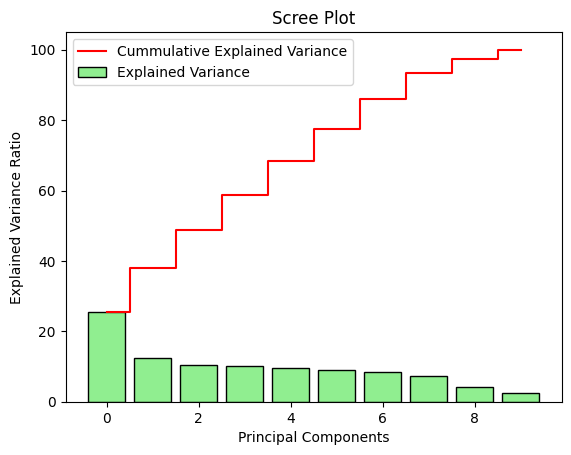

In [56]:
plt.bar(range(10), variance_explained, align='center', color='lightgreen', edgecolor='black', label='Explained Variance')
plt.step(range(10), cummulative_variance_explained, where='mid', color='red', label='Cummulative Explained Variance')

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')

plt.title('Scree Plot')
plt.legend(loc='best')
plt.show()

15. Apply K-means clustering and segment the data. (You may use original data or PCA transformed data)

a. Find the optimal K Value using elbow plot for K Means clustering.


b. Build a Kmeans clustering model using the obtained optimal K value from the elbow plot.


c. Compute silhouette score for evaluating the quality of the K Means clustering technique.

In [57]:
pca = PCA(n_components=8)
pca_df = pd.DataFrame(pca.fit_transform(dfs), columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6', 'PC-7', 'PC-8'])

In [58]:
pca_df.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8
0,-0.065297,0.085858,-0.660890,-1.116821,0.358088,-0.067057,-1.578394,0.774177
1,1.280418,-0.781451,0.686735,-0.950412,-0.650037,-0.138184,0.767793,-0.084980
2,-3.189877,-0.433435,0.998316,0.312626,1.303126,0.765587,0.234450,-0.118093
3,2.400504,-0.697264,2.251740,-0.884776,-1.135284,-0.357616,-0.266947,-0.492296
4,1.364009,2.092182,-0.267467,0.710883,1.774166,0.345727,-0.466555,-1.134705


In [59]:
pca_df.shape

(20000, 8)

In [60]:
cluster_errors = []
cluster_range = range(2,15)

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

In [61]:
cluster_df = pd.DataFrame({'Clusters':cluster_range,'Cluster_Errors':cluster_errors})

In [62]:
cluster_df

,Clusters,Cluster_Errors
0,2,155209.850730
1,3,141014.885140
2,4,129442.111052
3,5,119639.425269
4,6,113460.750188
5,7,108072.784674
6,8,103082.305974
7,9,99897.964691
8,10,96779.108738
9,11,94187.821444


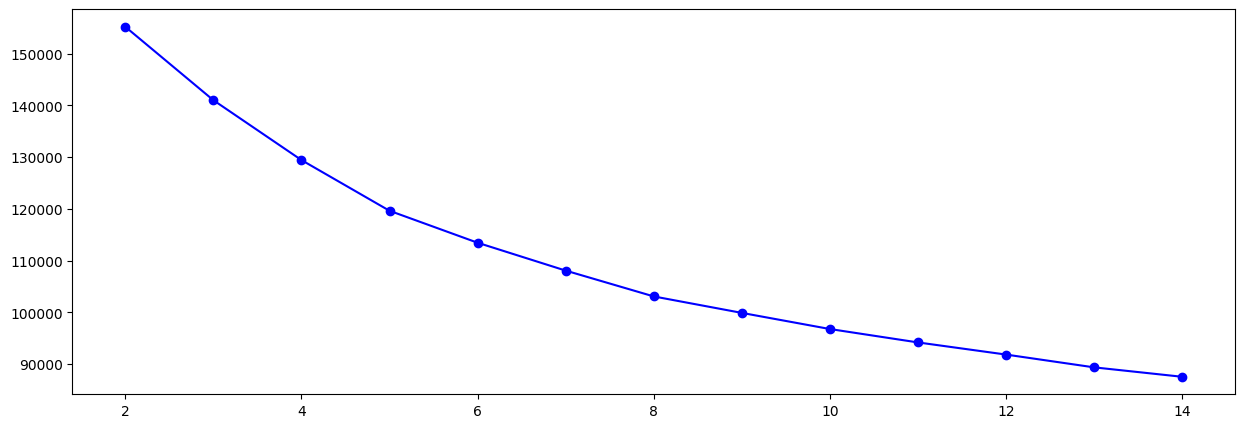

In [63]:
plt.figure(figsize=[15,5])
plt.plot(cluster_df['Clusters'],cluster_df['Cluster_Errors'],marker='o',color='blue')
plt.show()

In [64]:
kmeans = KMeans(n_clusters=2, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=2, random_state=100)

In [65]:
label = pd.DataFrame(kmeans.labels_, columns=['Label'])

In [66]:
kmeans_df = pca_df.join(label)

In [67]:
kmeans_df.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,Label
0,-0.065297,0.085858,-0.660890,-1.116821,0.358088,-0.067057,-1.578394,0.774177,1
1,1.280418,-0.781451,0.686735,-0.950412,-0.650037,-0.138184,0.767793,-0.084980,0
2,-3.189877,-0.433435,0.998316,0.312626,1.303126,0.765587,0.234450,-0.118093,1
3,2.400504,-0.697264,2.251740,-0.884776,-1.135284,-0.357616,-0.266947,-0.492296,0
4,1.364009,2.092182,-0.267467,0.710883,1.774166,0.345727,-0.466555,-1.134705,0


In [68]:
kmeans_df['Label'].value_counts()

Label
1    11914
0     8086
Name: count, dtype: int64

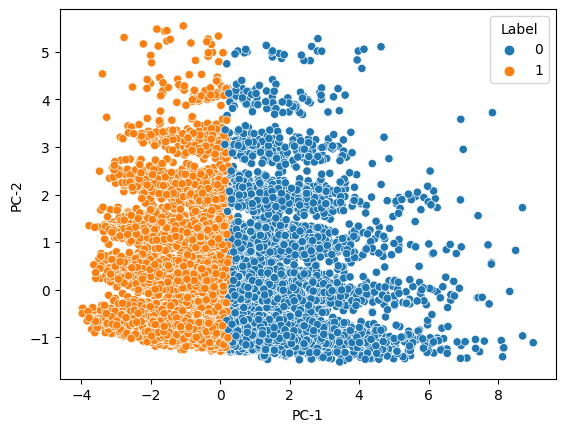

In [69]:
sns.scatterplot(x='PC-1', y='PC-2', hue='Label', data=kmeans_df)
plt.show()

In [70]:
print('Silhouette Score = ')

for i in range(2,15):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(pca_df)
    labels = kmeans.predict(pca_df)
    print(i ,'-', silhouette_score(pca_df, labels))

Silhouette Score = 
2 - 0.15971020274989148
3 - 0.15890924649687074
4 - 0.12665305738256386
5 - 0.1356938996055209
6 - 0.12700521047672184
7 - 0.12796563656433568
8 - 0.12701209047480913
9 - 0.11339366757828065
10 - 0.11806058553771555
11 - 0.11771564316456963
12 - 0.1217912750839403
13 - 0.1256194668951683
14 - 0.12702478862235084


16. Apply Agglomerative clustering and segment the data. (You may use original data or PCA transformed data)

a. Find the optimal K Value using dendrogram for Agglomerative clustering.

b. Build a Agglomerative clustering model using the obtained optimal K value observed from dendrogram.


c. Compute silhouette score for evaluating the quality of the Agglomerative clustering technique. (Hint: Take a sample of the dataset for agglomerative clustering to reduce the computational time).

In [71]:
pca_df.shape

(20000, 8)

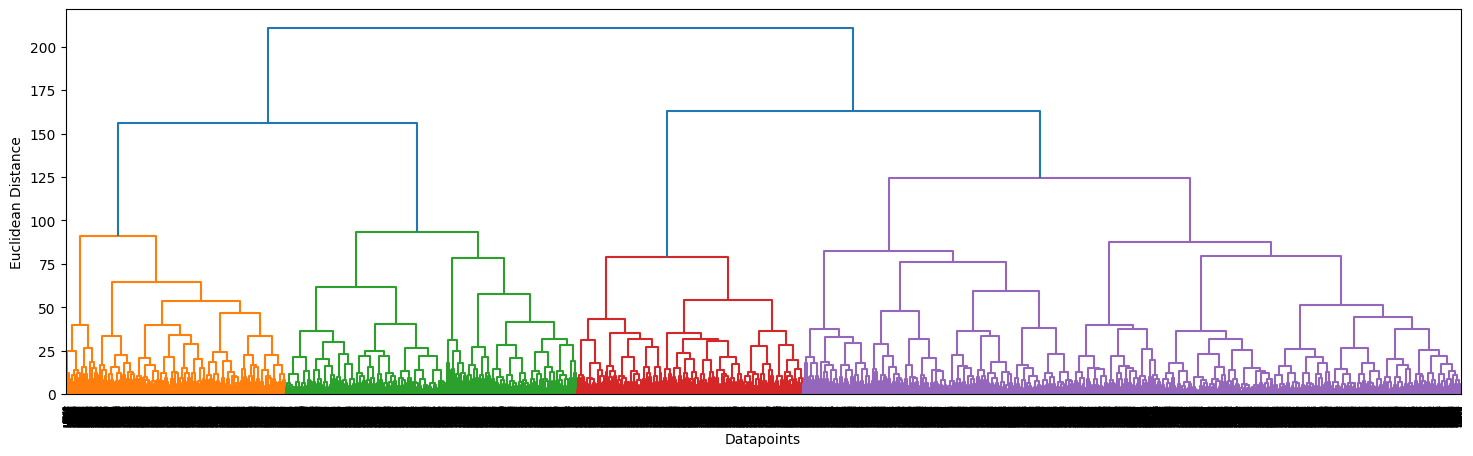

In [72]:
plt.figure(figsize=[18,5])
merg = linkage(pca_df, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean Distance')
plt.show()

In [73]:
hie_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hie_cluster_model = hie_cluster.fit(pca_df)

In [74]:
print('Silhouette Score = ')

for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(pca_df)
    labels = hier.fit_predict(pca_df)
    print(i,'-', silhouette_score(pca_df,labels))

Silhouette Score = 
2 - 0.1259161983834142
3 - 0.11260511055321273
4 - 0.12012955786824668
5 - 0.08169931661841276
6 - 0.0643409772079623
7 - 0.07024367351907351
8 - 0.05962534972416282
9 - 0.06110905815354611
10 - 0.04256080717822001
11 - 0.049028314706787174
12 - 0.052744478003547056
13 - 0.05792819591067862
14 - 0.06266114597990324


Conclusion -

17. Perform cluster analysis by doing bivariate analysis between cluster labels and different features and write your conclusion on the results.

In [75]:
labelled_df = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
labelled_df.head()

,Labels
0,1
1,1
2,2
3,1
4,3


In [76]:
labelled_df.value_counts()

Labels
0         9426
1         4178
2         3238
3         3158
Name: count, dtype: int64

In [77]:
labelled_df.shape

(20000, 1)

In [78]:
data.shape

(20000, 10)

In [79]:
df_hier = data.join(labelled_df)
df_hier.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age,Labels
0,fit,34c,140.0,8.0,work,pear,dress,67.0,8,37.0,1
1,fit,36d,140.0,10.0,other,full bust,dress,64.0,20,37.0,1
2,fit,32b,100.0,10.0,party,petite,sheath,62.0,1,30.0,2
3,fit,36dd,163.0,10.0,everyday,full bust,jacket,66.0,20,47.0,1
4,small,36b,135.0,8.0,wedding,hourglass,shift,68.0,20,32.0,3


In [80]:
df_hier.shape

(20000, 11)

In [81]:
df_hier.isnull().sum().sum()

0

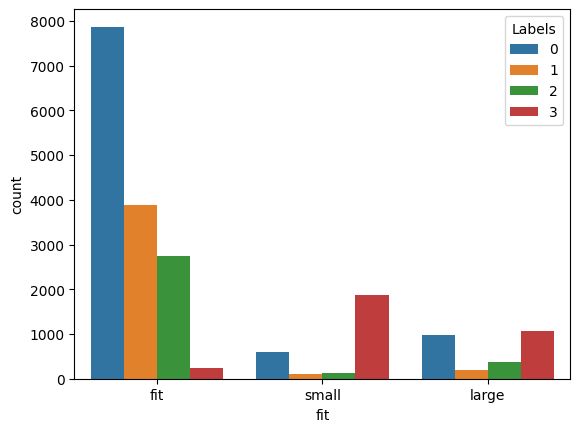

In [82]:
sns.countplot(x = 'fit', hue = 'Labels', data = df_hier)
plt.show()

In [83]:
df_fit = pd.DataFrame(df_hier.groupby('fit')['Labels'].value_counts())
df_fit

count
fit   Labels       
fit   0        7868
      1        3879
      2        2748
      3         230
large 3        1062
      0         971
      2         372
      1         200
small 3        1866
      0         587
      2         118
      1          99

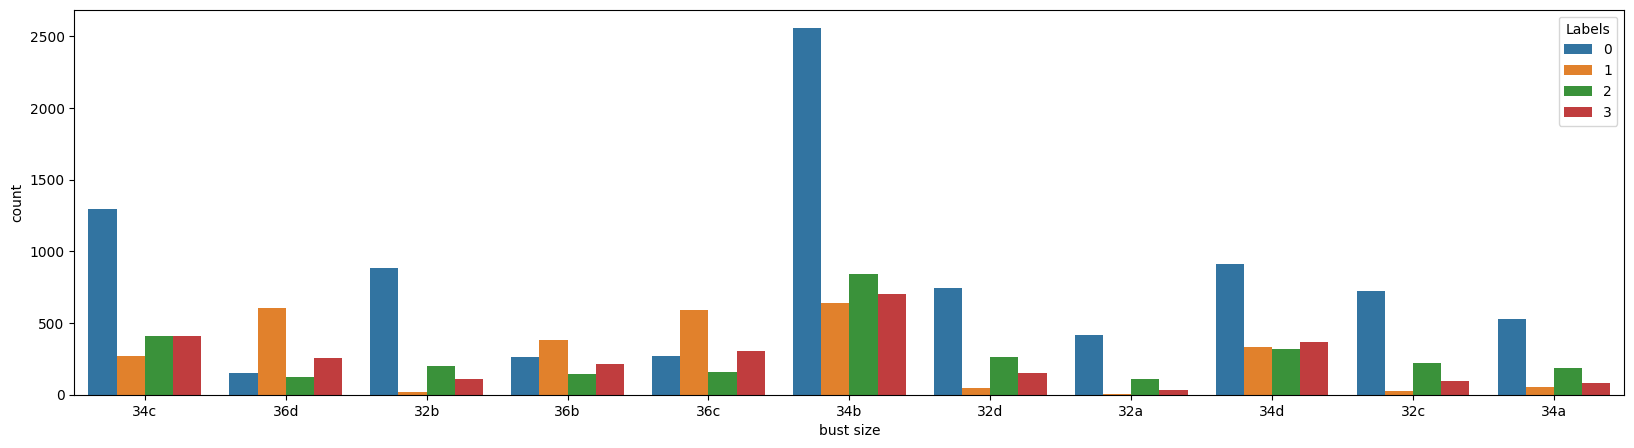

In [84]:
plt.figure(figsize=[20,5])

df_filtered_size = df_hier[df_hier['bust size'].map(df_hier['bust size'].value_counts()) > 500]

sns.countplot(x = 'bust size', hue = 'Labels', data = df_filtered_size)
plt.show()

In [85]:
df_bsize = pd.DataFrame(df_filtered_size.groupby('bust size')['Labels'].value_counts())
df_bsize

count
bust size Labels       
32a       0         416
          2         113
          3          36
          1           3
32b       0         882
          2         201
          3         109
          1          18
32c       0         720
          2         220
          3          94
          1          24
32d       0         747
          2         262
          3         150
          1          45
34a       0         528
          2         184
          3          82
          1          56
34b       0        2556
          2         841
          3         703
          1         637
34c       0        1297
          3         411
          2         406
          1         271
34d       0         912
          3         371
          1         333
          2         321
36b       1         379
          0         260
          3         211
          2         143
36c       1         588
          3         306
          0         267
          2         157
36d       1         605
          3         257
          0         154
          2         122

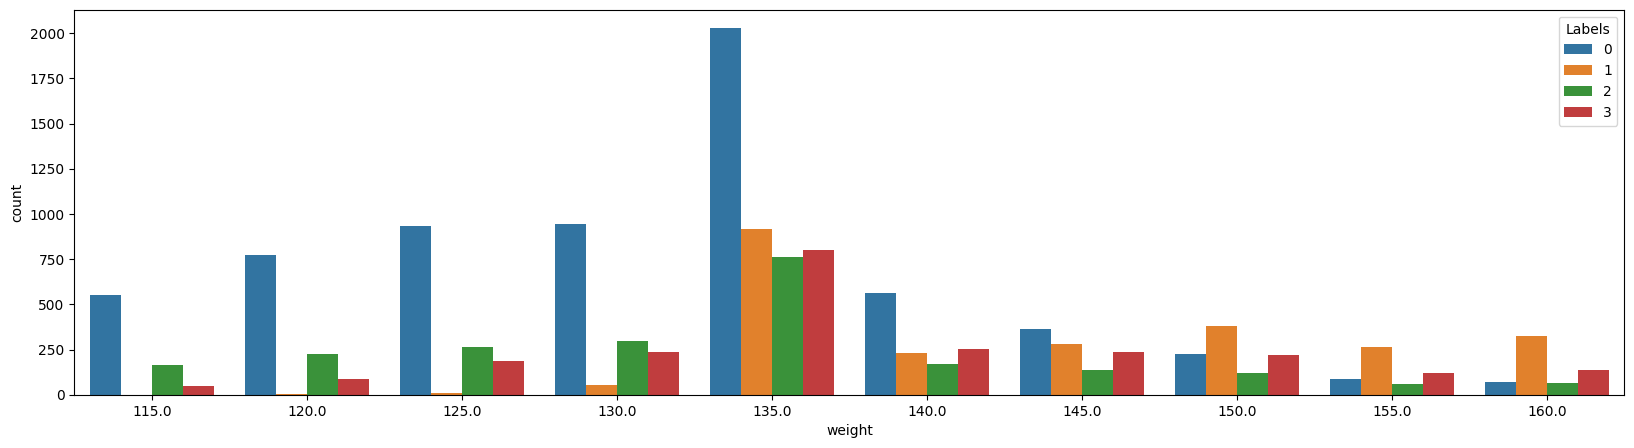

In [86]:
plt.figure(figsize=[20,5])

df_filtered_weight = df_hier[df_hier['weight'].map(df_hier['weight'].value_counts()) > 500]

sns.countplot(x = 'weight', hue = 'Labels', data = df_filtered_weight)
plt.show()

In [87]:
df_weight = pd.DataFrame(df_filtered_weight.groupby('weight')['Labels'].value_counts())
df_weight

count
weight Labels       
115.0  0         551
       2         162
       3          49
120.0  0         775
       2         227
       3          88
       1           3
125.0  0         931
       2         264
       3         188
       1          12
130.0  0         945
       2         298
       3         235
       1          55
135.0  0        2028
       1         915
       3         798
       2         762
140.0  0         562
       3         253
       1         230
       2         168
145.0  0         362
       1         279
       3         238
       2         139
150.0  1         379
       0         224
       3         218
       2         118
155.0  1         265
       3         118
       0          85
       2          57
160.0  1         323
       3         138
       0          72
       2          66

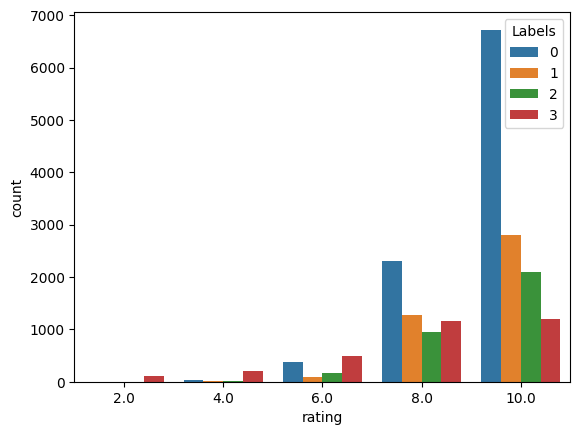

In [88]:
sns.countplot(x = 'rating', hue = 'Labels', data = df_hier)
plt.show()

In [89]:
df_rating = pd.DataFrame(df_hier.groupby('rating')['Labels'].value_counts())
df_rating

count
rating Labels       
2.0    3         102
       1           2
4.0    3         203
       0          32
       2          21
       1          10
6.0    3         497
       0         374
       2         169
       1          92
8.0    0        2298
       1        1281
       3        1154
       2         949
10.0   0        6722
       1        2793
       2        2099
       3        1202

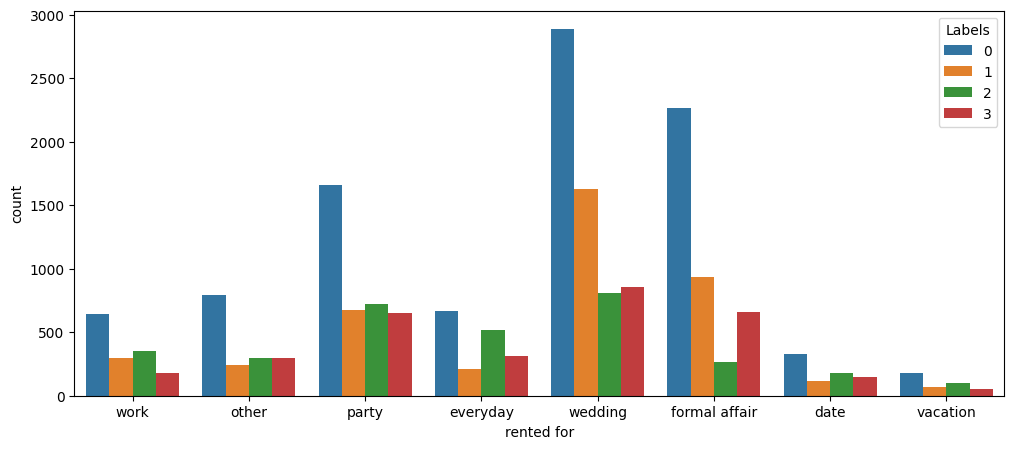

In [90]:
plt.figure(figsize=[12,5])

sns.countplot(x = 'rented for', hue = 'Labels', data = df_hier)
plt.show()

In [91]:
df_rented = pd.DataFrame(df_hier.groupby('rented for')['Labels'].value_counts())
df_rented

count
rented for    Labels       
date          0         325
              2         177
              3         146
              1         113
everyday      0         665
              2         519
              3         312
              1         209
formal affair 0        2265
              1         937
              3         662
              2         262
other         0         796
              2         299
              3         294
              1         246
party         0        1660
              2         721
              1         675
              3         649
vacation      0         181
              2          97
              1          72
              3          55
wedding       0        2889
              1        1628
              3         858
              2         812
work          0         645
              2         351
              1         298
              3         182

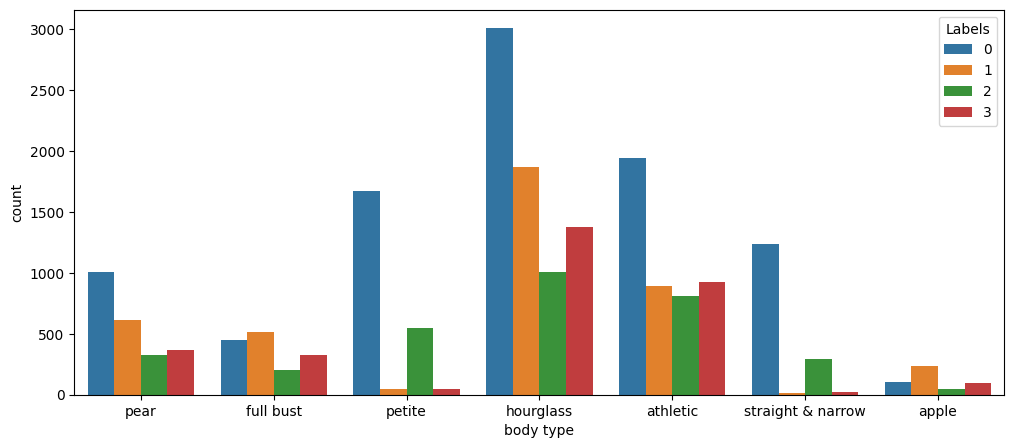

In [92]:
plt.figure(figsize=[12,5])

sns.countplot(x = 'body type', hue = 'Labels', data = df_hier)
plt.show()

In [93]:
df_bodytype = pd.DataFrame(df_hier.groupby('body type')['Labels'].value_counts())
df_bodytype

count
body type         Labels       
apple             1         233
                  0         107
                  3          94
                  2          46
athletic          0        1945
                  3         923
                  1         895
                  2         810
full bust         1         513
                  0         450
                  3         329
                  2         206
hourglass         0        3009
                  1        1865
                  3        1376
                  2        1007
pear              0        1009
                  1         612
                  3         366
                  2         328
petite            0        1671
                  2         549
                  3          46
                  1          43
straight & narrow 0        1235
                  2         292
                  3          24
                  1          17

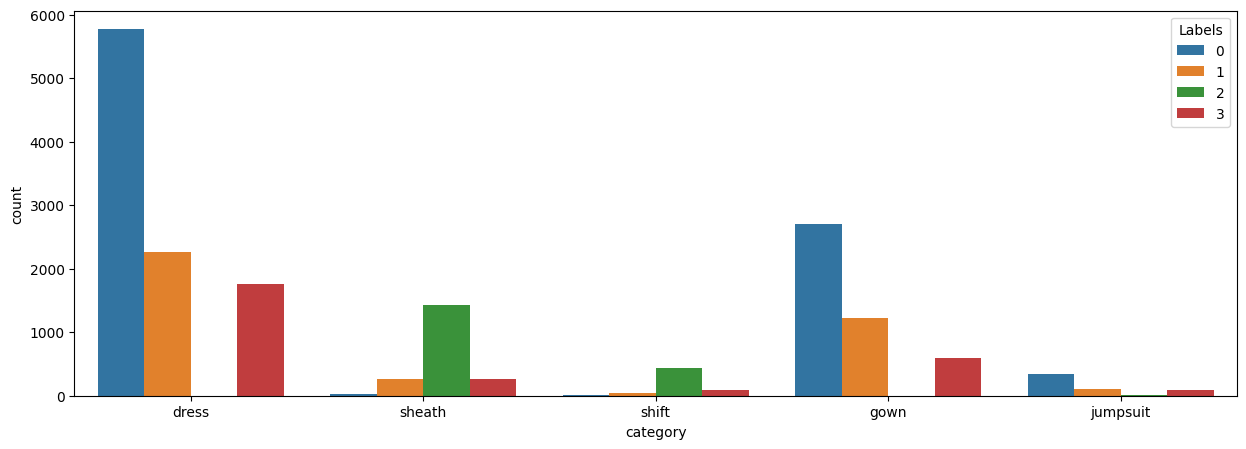

In [94]:
plt.figure(figsize=[15,5])

df_filtered_category = df_hier[df_hier['category'].map(df_hier['category'].value_counts()) > 500]

sns.countplot(x = 'category', hue = 'Labels', data = df_filtered_category)
plt.show()

In [95]:
df_category = pd.DataFrame(df_filtered_category.groupby('category')['Labels'].value_counts())
df_category

count
category Labels       
dress    0        5775
         1        2269
         3        1754
gown     0        2707
         1        1220
         3         591
jumpsuit 0         343
         1         102
         3          89
         2          10
sheath   2        1430
         3         266
         1         265
         0          20
shift    2         440
         3          89
         1          50
         0          10

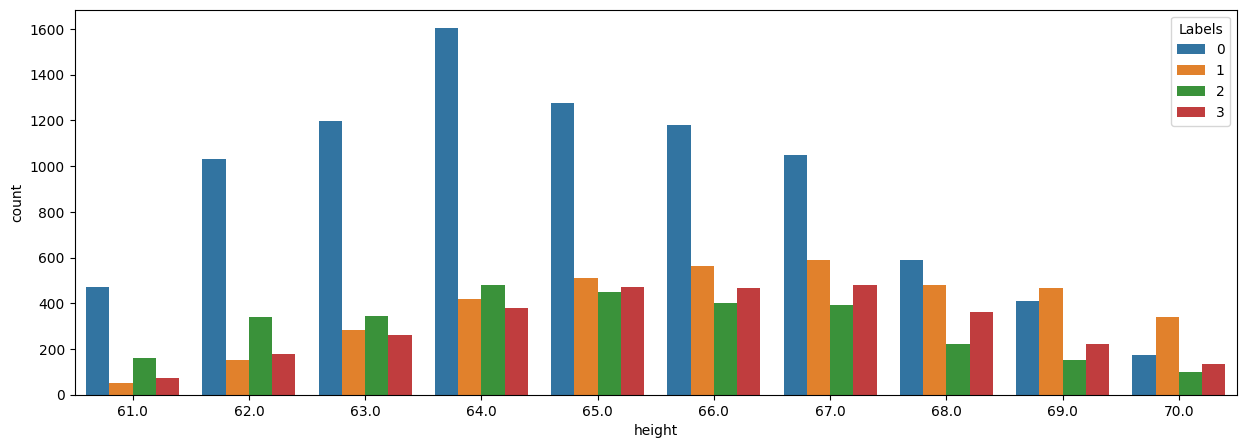

In [96]:
plt.figure(figsize=[15,5])

df_filtered_height = df_hier[df_hier['height'].map(df_hier['height'].value_counts()) > 500]

sns.countplot(x = 'height', hue = 'Labels', data = df_filtered_height)
plt.show()

In [97]:
df_height = pd.DataFrame(df_filtered_height.groupby('height')['Labels'].value_counts())
df_height

count
height Labels       
61.0   0         471
       2         160
       3          71
       1          52
62.0   0        1031
       2         338
       3         180
       1         153
63.0   0        1197
       2         343
       1         285
       3         261
64.0   0        1604
       2         479
       1         417
       3         381
65.0   0        1274
       1         511
       3         472
       2         450
66.0   0        1181
       1         564
       3         469
       2         400
67.0   0        1048
       1         588
       3         478
       2         393
68.0   0         591
       1         479
       3         360
       2         221
69.0   1         466
       0         410
       3         223
       2         154
70.0   1         342
       0         174
       3         134
       2         101

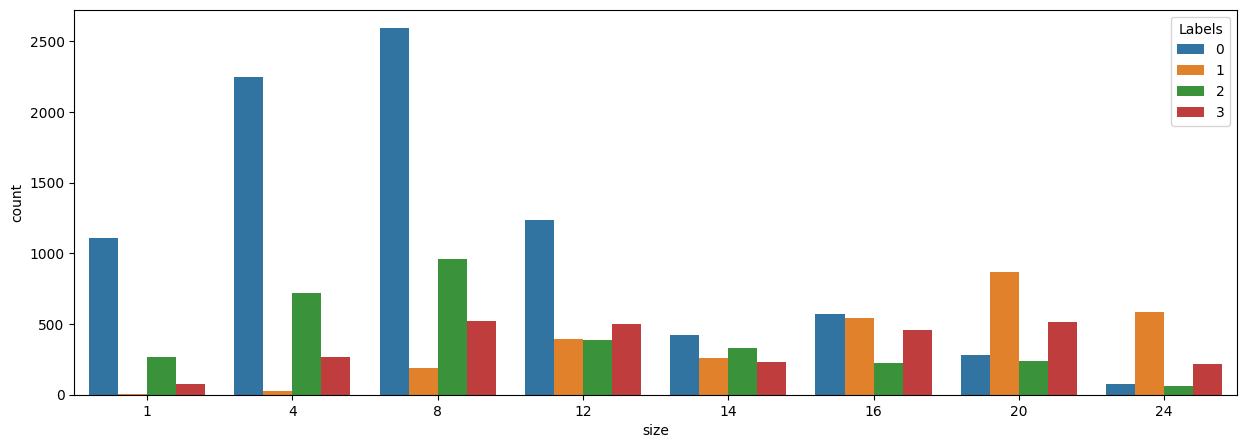

In [98]:
plt.figure(figsize=[15,5])

df_filtered_size = df_hier[df_hier['size'].map(df_hier['size'].value_counts()) > 500]

sns.countplot(x = 'size', hue = 'Labels', data = df_filtered_size)
plt.show()

In [99]:
df_size = pd.DataFrame(df_filtered_size.groupby('size')['Labels'].value_counts())
df_size

count
size Labels       
1    0        1108
     2         265
     3          79
     1           5
4    0        2246
     2         721
     3         269
     1          27
8    0        2592
     2         959
     3         523
     1         189
12   0        1233
     3         497
     1         392
     2         388
14   0         425
     2         333
     1         257
     3         228
16   0         572
     1         543
     3         457
     2         224
20   1         866
     3         511
     0         281
     2         235
24   1         586
     3         215
     0          79
     2          62

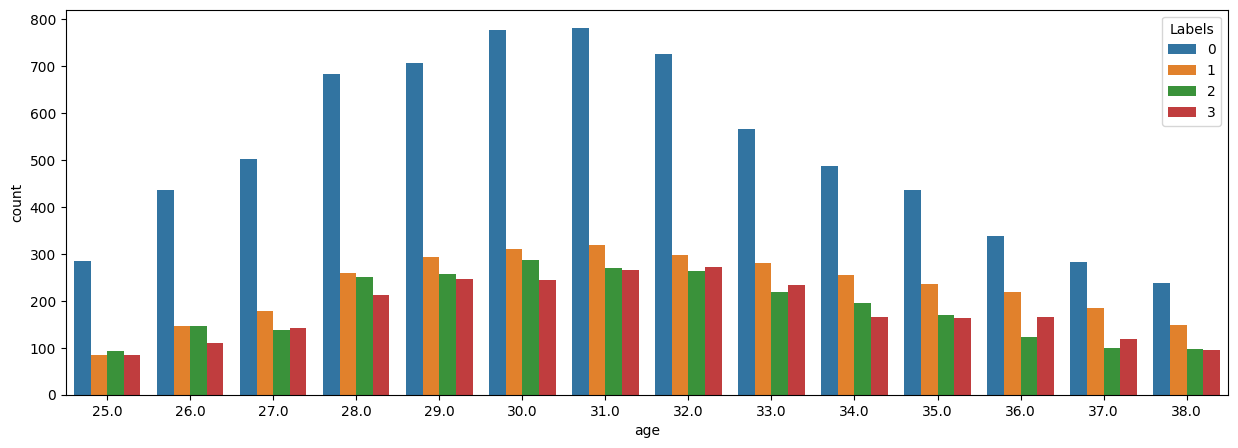

In [100]:
plt.figure(figsize=[15,5])

df_filtered_age = df_hier[df_hier['age'].map(df_hier['age'].value_counts()) > 500]

sns.countplot(x = 'age', hue = 'Labels', data = df_filtered_age)
plt.show()

In [101]:
df_age = pd.DataFrame(df_filtered_age.groupby('age')['Labels'].value_counts())
df_age

count
age  Labels       
25.0 0         285
     2          94
     3          85
     1          84
26.0 0         437
     1         147
     2         147
     3         111
27.0 0         502
     1         179
     3         143
     2         137
28.0 0         684
     1         260
     2         250
     3         212
29.0 0         707
     1         294
     2         258
     3         247
30.0 0         776
     1         310
     2         288
     3         245
31.0 0         781
     1         319
     2         269
     3         266
32.0 0         726
     1         298
     3         272
     2         263
33.0 0         566
     1         281
     3         234
     2         219
34.0 0         487
     1         255
     2         196
     3         166
35.0 0         435
     1         236
     2         170
     3         163
36.0 0         339
     1         218
     3         166
     2         124
37.0 0         282
     1         185
     3         119
     2         100
38.0 0         238
     1         148
     2          98
     3          96